## Ads conversion (mini-project)¶

**Importing libraries**

In [72]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing dataset from a csv zipped file in the working directory**

In [12]:
df = pd.read_csv('conversion.zip', compression='zip')

df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


**Checking general info**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


**Checking columns datatypes**

In [14]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

**Finding the number of unique ads campaigns**

In [16]:
df.xyz_campaign_id.nunique()

3

**Plot the distribution of impressions for each FB campaign (use log scale)**

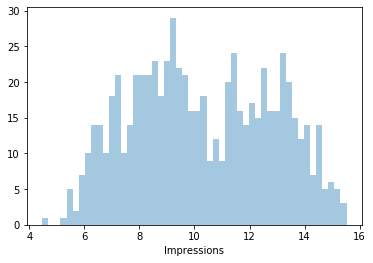

In [50]:
impressions = df.groupby('fb_campaign_id').Impressions.sum()
impr_lg = np.log(impressions)

sns.distplot(impr_lg, kde=False, bins=50)


# The distribution is bimodal. The data is not normally distributed.

**Calculate CTR (click-through rate) values and add them to the dataframe**

In [52]:
df['ctr'] = df.Clicks / df.Impressions

df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171


**Show the ad with the max CTR**

In [55]:
df[df['ctr'] == df['ctr'].max()]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


**Graph CTR for the xyz_campaign_id = 916**

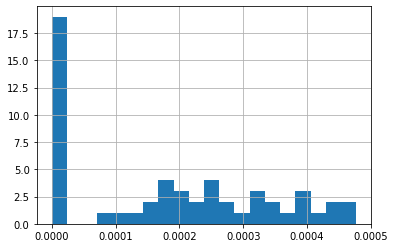

In [66]:
df[df['xyz_campaign_id'] == 916].ctr.hist(bins=20)

**Calculate CPC (cost-per-click) values and add them to the dataframe**

In [67]:
df['cpc'] = df.Spent / df.Clicks

df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926


**Graph the CPC data**

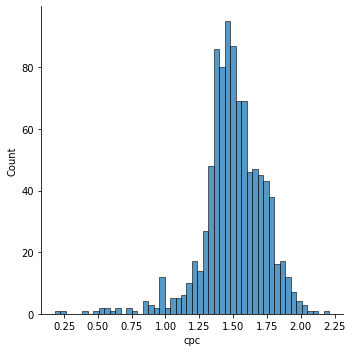

In [71]:
sns.displot(df.dropna().cpc, kde=False, bins=50);

**Find the interquartile range (IQR) for CPC. Round values to 2 decimal places**

In [74]:
round(st.iqr(df.cpc, nan_policy='omit'), 2)

0.25

**Graph the CPC data (density distribution) splitted by gender**

/home/nktnlx/yes/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nktnlx/yes/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


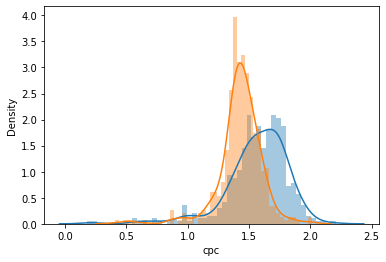

In [92]:
sns.distplot(df[df['gender'] == 'M'].dropna().cpc, bins=50);
sns.distplot(df[df['gender'] == 'F'].dropna().cpc, bins=50);

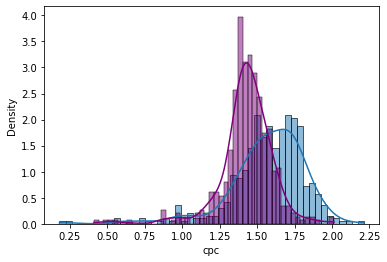

In [96]:
# alternative way using .histplot()
sns.histplot(df[df['gender'] == 'M'].dropna().cpc, kde=True, bins=50, stat='density');
sns.histplot(df[df['gender'] == 'F'].dropna().cpc, kde=True, color='purple', bins=50, stat='density');

**Calculate CR (conversion rate) values and add them to the dataframe**

In [97]:
df['cr'] = df.Approved_Conversion / df.Clicks

df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,1.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.007937
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926,0.014815


**Find CR (in percentage) for ad_id = 1121814. Round values to 2 decimal places**

In [103]:
round(df[df['ad_id'] == 1121814].cr * 100, 2)

860    3.09
Name: cr, dtype: float64